#### **lazypredict is a Python library that provides a simple way to quickly train and evaluate various machine learning models with minimal code. It's useful for quickly prototyping and comparing different models to get a sense of their performance.**

In [1]:
! pip install lazypredict

In [3]:
! pip install "dask[dataframe]"


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 4.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [5]:
df = pd.read_csv('final_dataset_for_model_building.csv')

In [6]:
X = df.drop('pIC50', axis=1)
Y = df['pIC50']

In [7]:
X.shape

(118, 881)

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(118, 197)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### **Compare ML algorithms**

In [10]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:15<00:00,  2.74it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 94, number of used features: 197
[LightGBM] [Info] Start training from score 4.530903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:13<00:00,  3.00it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 94, number of used features: 197
[LightGBM] [Info] Start training from score 4.530903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [14]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,56340008392742532188059521522689533224428300190...,-6300388035317444118363288479563201326173950059...,6249818403280772470601734015475459523870720.00,0.21
KernelRidge,30.72,-32.24,4.54,0.05
Lasso,1.89,0.00,0.79,0.05
DummyRegressor,1.89,0.00,0.79,0.04
ElasticNet,1.89,0.00,0.79,0.04
LassoLars,1.89,0.00,0.79,0.04
LarsCV,1.77,0.13,0.73,1.02
LassoLarsCV,1.45,0.50,0.56,0.15
KNeighborsRegressor,1.41,0.54,0.53,0.04


In [18]:
predictions_train.sort_values(by='R-Squared', ascending=False).head(30)


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,1.09,0.90,0.25,0.47
DecisionTreeRegressor,1.09,0.90,0.25,0.07
ExtraTreeRegressor,1.09,0.90,0.25,0.06
GaussianProcessRegressor,1.09,0.90,0.25,0.06
XGBRegressor,1.09,0.90,0.25,0.16
TransformedTargetRegressor,1.09,0.90,0.25,0.09
LinearRegression,1.09,0.90,0.25,0.05
GradientBoostingRegressor,1.10,0.88,0.27,0.23
Ridge,1.11,0.88,0.28,0.03


[(0.0, 1.0)]

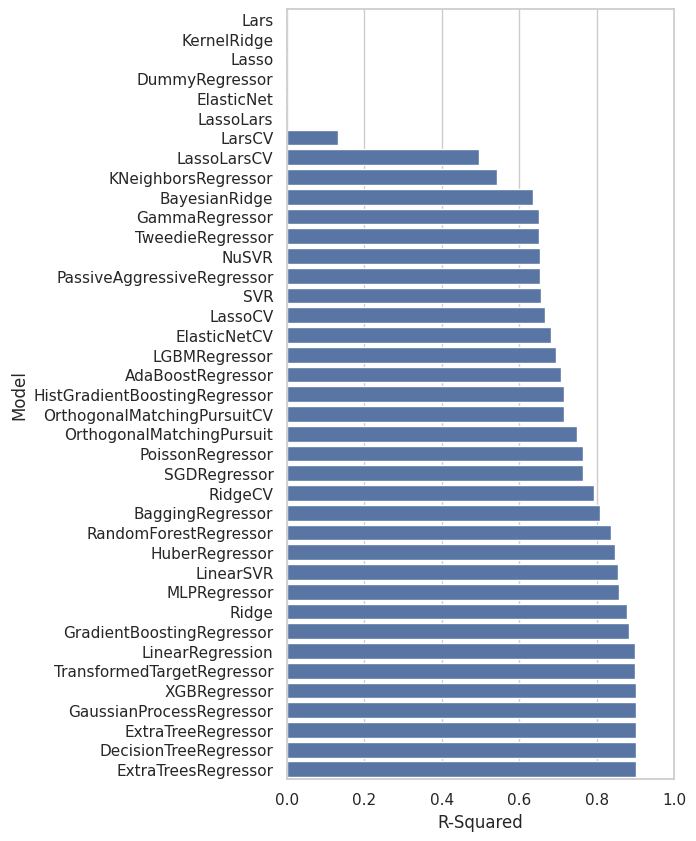

In [19]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

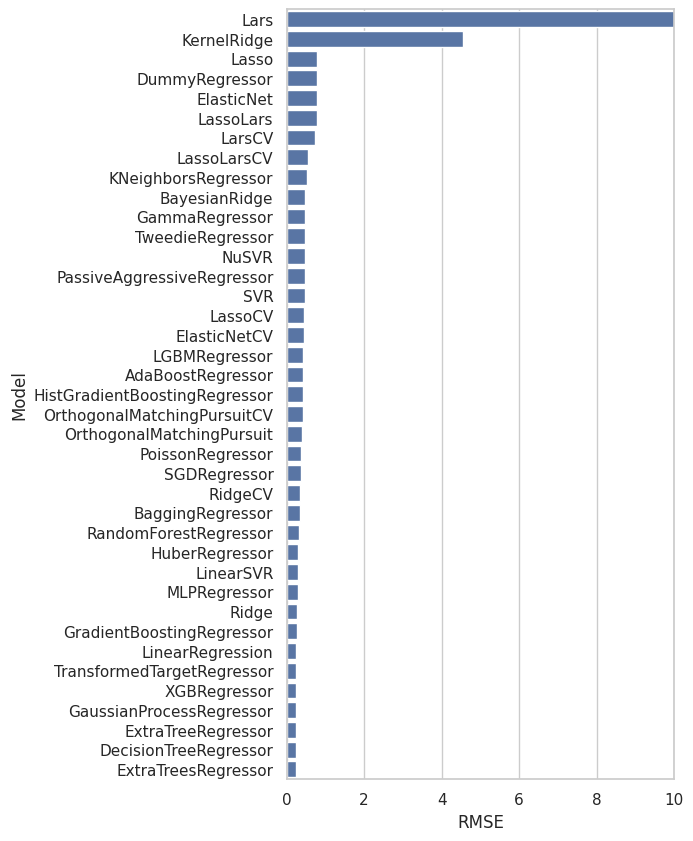

In [20]:
# Bar plot of RMSE values   Root Mean Squared Error
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

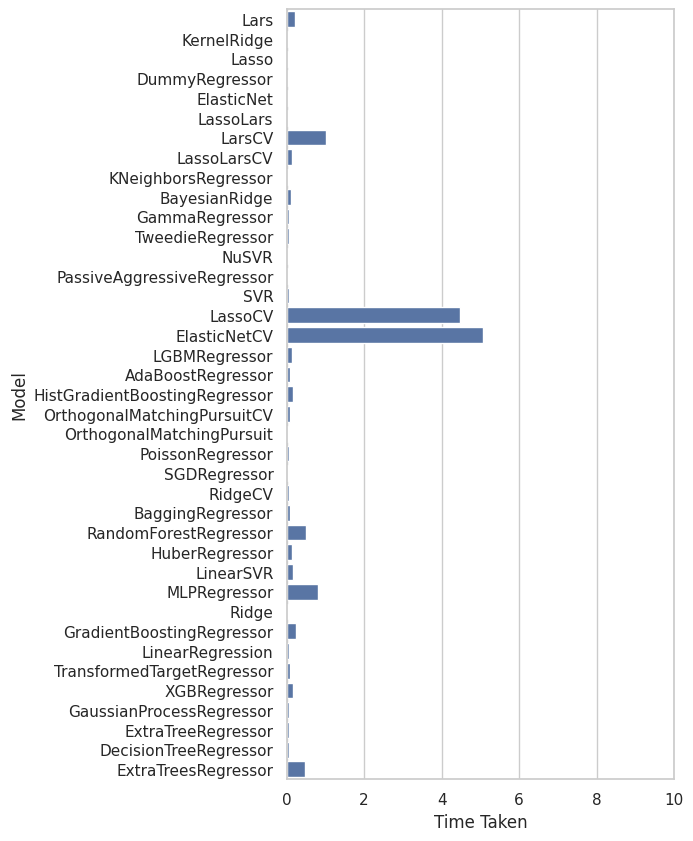

In [21]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))